###En esta segunda entrega, vamos a hacer un análisis de reviews en Yelp.


**GRUPO 1**

- Daniel Aguilera
- Gianella Salluzzi
- Gisela Turletti
- Guillermo More
- Marcos Savy 

Fecha de entrega y presentación: 29/11/2021

###Instalamos librerías y reiniciamos el entorno de ejecución.

In [ ]:
!pip install transformers
!pip install sentence_transformers
!pip install keybert
!pip install bertopic

### Importación de librerías

Importamos todas las librerías que utilizaremos a lo largo del proyecto.

In [ ]:
from keybert import KeyBERT
from bertopic import BERTopic
from textblob import TextBlob
from wordcloud import WordCloud

In [ ]:
import numpy as np
import pandas as pd
import spacy

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Importación del DataFrame y Exploración inicial

Se importa el archivo .csv y se hace un análisis inicial de los datos.

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE' -O reviews.csv

--2021-11-29 22:32:30--  https://docs.google.com/uc?export=download&id=1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE
Resolving docs.google.com (docs.google.com)... 142.250.188.206, 2607:f8b0:4004:83e::200e
Connecting to docs.google.com (docs.google.com)|142.250.188.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cfavehs82tvk3720juuvhdfml0beif2e/1638225150000/14260194928165318342/*/1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE?e=download [following]
--2021-11-29 22:32:34--  https://doc-10-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cfavehs82tvk3720juuvhdfml0beif2e/1638225150000/14260194928165318342/*/1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE?e=download
Resolving doc-10-74-docs.googleusercontent.com (doc-10-74-docs.googleusercontent.com)... 142.251.45.97, 2607:f8b0:4004:83f::2001
Connecting to doc-10-74-docs.googleusercontent.com (doc-10-74-docs.goog

In [ ]:
df = pd.read_csv("/content/reviews.csv")
df.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it does seem like a throwback to 30 years ago, old fashioned menu board, booths out of the 70s, and a large selection of food. Their speciality is the Italian Hoagie, and it is voted the best in the area year after year. I usually order the burger, while the patties are obviously cooked from frozen, all of the other ingredients are very fresh. Overall, its a good alternative to Subway, which is down the road.",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,"Excellent food. Superb customer service. I miss the mario machines they used to have, but it's still a great place steeped in tradition.",0,5UmKMjUEUNdYWqANhGckJw,0,5,2014-02-13,review,0
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not opened on the weekend. But other than that the staff is always pleasant and fast to make your order. Which is always spot on fresh veggies on their hoggies and other food. They also have daily specials and ice cream which is really good. I had a banana split they piled the toppings on. They win pennysaver awards ever years i see why.,0,5UmKMjUEUNdYWqANhGckJw,0,5,2015-10-31,review,0
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,"All the food is great here. But the best thing they have is their wings. Their wings are simply fantastic!! The ""Wet Cajun"" are by the best & most popular. I also like the seasoned salt wings. Wing Night is Monday & Wednesday night, $0.75 whole wings!\n\nThe dining area is nice. Very family friendly! The bar is very nice is well. This place is truly a Yinzer's dream!! ""Pittsburgh Dad"" would love this place n'at!!",0,UsFtqoBl7naz8AVUBZMjQQ,0,5,2013-11-08,review,0
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,"We checked this place out this past Monday for their wing night. We have heard that their wings are great and decided it was finally time to check it out. Their wings are whole wings and crispy, which is a nice change of pace. I got their wet Cajun sauce and garlic butter wings. The Cajun did not have a bold enough flavor for me and their sauce is too thin. The sauce was also thin for the garlic butter, but that is more expected. They were better than average, but I don't like seeing all the sauce resting at the bottom of the boat. I would definitely come try this place out again to sample some of the other items on the menu, but this will probably not become a regular stop for wings anytime soon.",0,UsFtqoBl7naz8AVUBZMjQQ,0,3,2014-03-29,review,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27290 entries, 0 to 27289
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       27290 non-null  object
 1   review_id     27290 non-null  object
 2   text          27290 non-null  object
 3   votes.cool    27290 non-null  int64 
 4   business_id   27290 non-null  object
 5   votes.funny   27290 non-null  int64 
 6   stars         27290 non-null  int64 
 7   date          27290 non-null  object
 8   type          27290 non-null  object
 9   votes.useful  27290 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.1+ MB


In [ ]:
df.describe()

,votes.cool,votes.funny,stars,votes.useful
count,27290.000000,27290.000000,27290.000000,27290.000000
mean,0.392158,0.319531,3.623232,0.830158
std,1.259318,1.122261,1.320829,1.611410
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000
50%,0.000000,0.000000,4.000000,0.000000
75%,0.000000,0.000000,5.000000,1.000000
max,61.000000,52.000000,5.000000,52.000000


Fechas de las reviews.

In [ ]:
print("Fecha del primer review:", df.date.min())

print("Fecha del último review:", df.date.max())

Fecha del primer review: 2005-09-06
Fecha del último review: 2015-12-24


Cantidad de reviews segun calificación con estrellas 1-5

In [ ]:
print(df.stars.value_counts())

5    8722
4    8398
3    4380
1    3044
2    2746
Name: stars, dtype: int64


Count plot on single categorical variable.

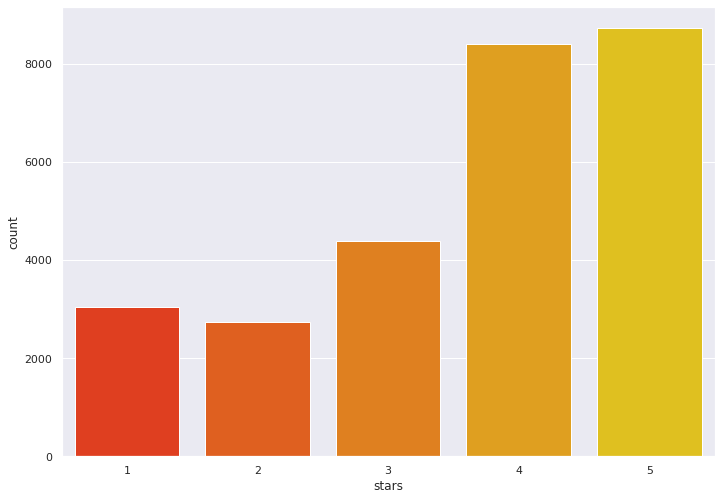

In [ ]:
sns.countplot(x ='stars', data = df, palette='autumn')
plt.show()

Se observan cuántos negocios y usuarios diferentes hay en el dataset

In [ ]:
print("Cantidad de negocios calificados:", df.business_id.nunique())
print("Cantidad de usuarios que calificaron:", df.user_id.nunique())

Cantidad de negocios calificados: 1320
Cantidad de usuarios que calificaron: 14861


Wordcloud de dataset completo.

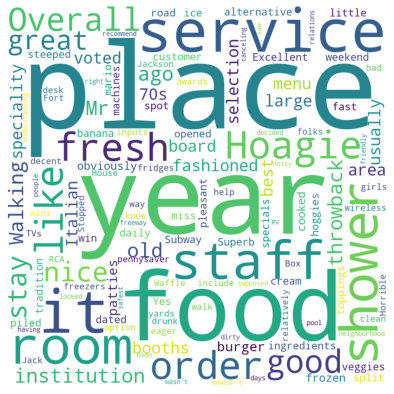

In [ ]:
nlp = spacy.load("en_core_web_sm")

word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(df["text"].values))

plt.figure(figsize=(7,7))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Seleccionamos los 20 negocios con más reviews par realizar un análisis más fluido y ágil.

In [ ]:
df.business_id.value_counts().head(20)

3Q0QQPnHcJuX1DLCL9G9Cg    1068
mpDxBBGywUE6GRRKja3sBA     527
NeUf9FyCCIN4MEseNyqkXQ     387
jTGQUWGIVvL-aY03C5BEmw     292
NTfUFk8GyOLL1uPbEO-pVg     250
XmdTkxKyJd7TuDLoiic1kg     249
2X5G4Ujq0s4Wfn4TC7gX0g     243
vgXE1I7c9ElcfYyZfQiN1Q     243
2SwC8wqpZC4B9iFVTgYT9A     239
rgmptwPbBH1wLpiBHcbIhA     221
2Igiyhi82R8_QaaPplRmCw     213
MQnNtW1lHS-eid3QNUoUIw     212
CChwRoYVXA3QZulS8a6xOQ     211
ePP0Eqz8JKSbtdt2phiB4A     197
ym9QwkmB5ZKTyj7q5huTDw     189
dxCqGkhtXq-9fYEsX7Mf6Q     188
9SPwF-vRgtuHxciFxv5YLA     186
WuCcv_Dyd_1B_1-4jwK7sQ     182
TxKmAsKQjND5vbhBdUSyIA     180
xgK6AAhJ-cYBUCSaLzgTuw     173
Name: business_id, dtype: int64

In [ ]:
n_top20= df.business_id.value_counts()[0:20].sum()
n_total= df.value_counts().sum()
porc= (n_top20 / n_total * 100).round(2)
print(f"Los 20 negocios mas calificados suman {n_top20} registros.")
print(f"Representan el {porc}% del total del dataset original.")

Los 20 negocios mas calificados suman 5650 registros.
Representan el 20.7% del total del dataset original.


Vemos el largo de cada texto de calificacion y guardamos en una nueva columna.

In [ ]:
df['text_len'] = df['text'].apply(lambda x: len(x))

Vemos la distribución de largo de los textos de calificación.

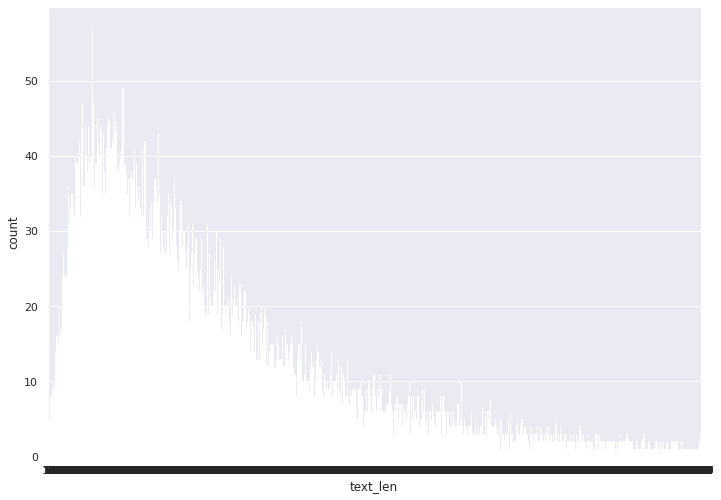

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x ='text_len', data = df)
plt.show()

Creamos un nuevo dataframe con estos 5650 registros del TOP 20.

In [ ]:
df_mas_reviews = df.groupby('business_id').filter(lambda x: len(x) >= 170)
df_mas_reviews

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,text_len
2332,kdljP-HPIz1SMPZ2-B3NHA,RWU0-370PJUlEzz5AX_u4w,"Great stuff here...The cheese plates are great and always changing. Awesome staff, and the menu offers an nice variety!!\n\nAsk for Tim for your waiter!",0,2SwC8wqpZC4B9iFVTgYT9A,0,4,2007-04-25,review,0,150
2333,UzqOYLCssQS2FBcDq5HwkA,8rMME0OWVJQ2FeeHG7wUfQ,"This place used to have a great bar/tapas menu with a decent selection of happy hour wine specials. Now... not so much. Well, during HH, you can get any of the wines under $10 for $5. Selection by the glass is limited. \n\nAs for their menu/dinner - this is totally a different story. I haven't really been disappointed yet! The appetizers/small plates all pretty good, I really like the chevre croquettes ($7). The salads are good and although I haven't gotten the soup anytime lately, I hear great things from my friends. The entrees are always excellent - I usually tend to stick to the seafood (halibut, $29) and never have been disappointed (and importantly, nothing has ever been overcooked). The signature orecchiette dish ($20) is soooo delicious - just ignore the fact that it is a heart attack waiting to happen - it's worth it. The desserts are ok, personally, I feel that you would be better advised to stick to filling up on the entrees. \n\nOh, and let me recommend the blood orange martini if they have it - very very yummy! And it is nice that you can order Veuve Cliquot by the glass ($16).\n\nPrices are a bit high for what you'd expect for Pittsburgh, but considering the quality of food, I would recommend it.\n\nP.S. I have heard that they have a great brunch on Sundays. I personally haven't tried it, but with the number of compliments I hear, it's probably worth the try!\n\n-------------------------\nUpdate 12/9/07: Went to the brunch. What a great deal! For $22, you get a choice of alcoholic beverage (bloody mary, mimosa, bellini) as well as a starter and then the entree. They have a lot of choices, so be prepared to just try one and come back again to try the other stuff! The smoked salmon appetizer was good although with too much mayonnaise sauce and for me, too much onion. The truffled potato was yummy. The arugula salad was as delicious as ever! And for entree, we both got the Casbah benedict. I have to admit that neither of us was blown away, but it was good and filling. I think that we will both be back to try other things on the menu!",0,2SwC8wqpZC4B9iFVTgYT9A,0,4,2007-07-16,review,1,2092
2334,TckShYnQa0eD3WQxdoE3GQ,oulyefOGLSaeYDwwWSuZZg,"Well it's official Shadyside is becoming my new favorite area for restaurants. Damn you Big Burrito Group with your local ingredients, contemporary design and excellent service. I was here last night and on a Monday this place was doing brisk business (definitely a good sign). The space itself is beautiful. You enter from S. Highland into the outdoor dining area, which because of the heaters is viable almost every day of the year. There is plenty of seating outdoors and a few tables indoors. The design is contemporary. The bar is large and has a nice area opposite for more informal seating. The one thing I dislike about the bar area is that the ""stools"" are actually chairs that are not moveable, so your distance next to your ""neighbor"" is pre-determined. I also prefer to stand at the bar instead of sitting and this set up makes that more difficult. The wine selection is pretty extensive and they have a good happy hour special that any wine or premium cocktail is just $5, which is really good when many of their wines are priced at over $10 per glass. The hostess was very nice and professional even though she was young taking our names as we went to the bar for a drink and then anticipating our return with two menus in hand. The server was a nice enough guy and helpful when it came time for our dinner selection. We ordered a bottle of conundrum which is a delicious choice and I g

In [ ]:
df_mas_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5650 entries, 2332 to 24313
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       5650 non-null   object
 1   review_id     5650 non-null   object
 2   text          5650 non-null   object
 3   votes.cool    5650 non-null   int64 
 4   business_id   5650 non-null   object
 5   votes.funny   5650 non-null   int64 
 6   stars         5650 non-null   int64 
 7   date          5650 non-null   object
 8   type          5650 non-null   object
 9   votes.useful  5650 non-null   int64 
 10  text_len      5650 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 529.7+ KB


Realizamos el mismo análisis que teníamos para el dataset completo.

In [ ]:
df_mas_reviews['text_len'] = df_mas_reviews['text'].apply(lambda x: len(x))

In [ ]:
print("Fecha del primer review:", df_mas_reviews.date.min())

print("Fecha del último review:", df_mas_reviews.date.max())

Fecha del primer review: 2005-09-06
Fecha del último review: 2015-12-24


In [ ]:
print(df_mas_reviews.stars.value_counts())

4    2129
5    1733
3     970
2     518
1     300
Name: stars, dtype: int64


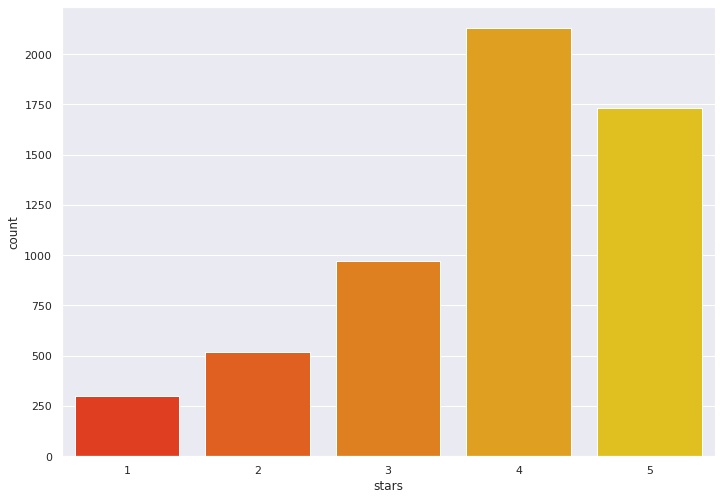

In [ ]:
sns.countplot(x ='stars', data = df_mas_reviews, palette='autumn')
plt.show()

In [ ]:
print("Cantidad de negocios calificados:", df_mas_reviews.business_id.nunique())
print("Cantidad de usuarios que calificaron:", df_mas_reviews.user_id.nunique())

Cantidad de negocios calificados: 20
Cantidad de usuarios que calificaron: 4600


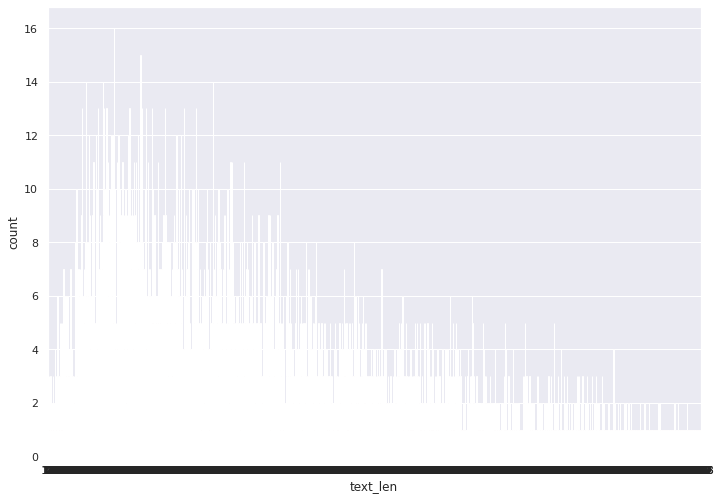

CPU times: user 40.5 s, sys: 3.91 s, total: 44.4 s
Wall time: 41.7 s


In [ ]:
%%time
# count plot on single categorical variable
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x ='text_len', data = df_mas_reviews, color = 'pink')
# Show the plot
plt.show()

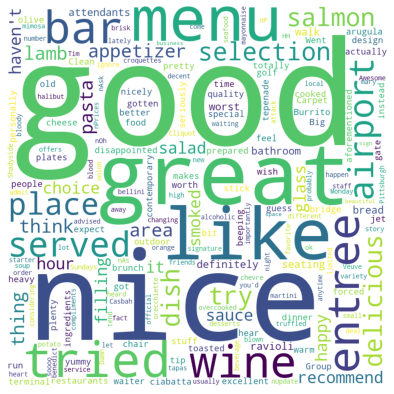

In [ ]:
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(df_mas_reviews["text"].values))

plt.figure(figsize=(7,7))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

### Keywords

Utilizamos Keybert para encontrar palabras clave de las reviews

In [ ]:
kw_model = KeyBERT()

In [ ]:
%%time
df_mas_reviews["KEYWORDS"] = df_mas_reviews.text.apply(lambda x: kw_model.extract_keywords(x, top_n=3, keyphrase_ngram_range=(1,1)))   #PAra ver despues ngramas

CPU times: user 40min 27s, sys: 3min 48s, total: 44min 16s
Wall time: 22min 31s


In [ ]:
pd.set_option("display.max_colwidth", None)

In [ ]:
#Eliminamos scores de cada keyword
df_mas_reviews["KEYWORDS"] = df_mas_reviews.KEYWORDS.apply(lambda keywords: [k[0] for k in keywords])

In [ ]:
df_mas_reviews.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,text_len,KEYWORDS
2332,kdljP-HPIz1SMPZ2-B3NHA,RWU0-370PJUlEzz5AX_u4w,"Great stuff here...The cheese plates are great and always changing. Awesome staff, and the menu offers an nice variety!!\n\nAsk for Tim for your waiter!",0,2SwC8wqpZC4B9iFVTgYT9A,0,4,2007-04-25,review,0,150,"[plates, cheese, waiter]"
2333,UzqOYLCssQS2FBcDq5HwkA,8rMME0OWVJQ2FeeHG7wUfQ,"This place used to have a great bar/tapas menu with a decent selection of happy hour wine specials. Now... not so much. Well, during HH, you can get any of the wines under $10 for $5. Selection by the glass is limited. \n\nAs for their menu/dinner - this is totally a different story. I haven't really been disappointed yet! The appetizers/small plates all pretty good, I really like the chevre croquettes ($7). The salads are good and although I haven't gotten the soup anytime lately, I hear great things from my friends. The entrees are always excellent - I usually tend to stick to the seafood (halibut, $29) and never have been disappointed (and importantly, nothing has ever been overcooked). The signature orecchiette dish ($20) is soooo delicious - just ignore the fact that it is a heart attack waiting to happen - it's worth it. The desserts are ok, personally, I feel that you would be better advised to stick to filling up on the entrees. \n\nOh, and let me recommend the blood orange martini if they have it - very very yummy! And it is nice that you can order Veuve Cliquot by the glass ($16).\n\nPrices are a bit high for what you'd expect for Pittsburgh, but considering the quality of food, I would recommend it.\n\nP.S. I have heard that they have a great brunch on Sundays. I personally haven't tried it, but with the number of compliments I hear, it's probably worth the try!\n\n-------------------------\nUpdate 12/9/07: Went to the brunch. What a great deal! For $22, you get a choice of alcoholic beverage (bloody mary, mimosa, bellini) as well as a starter and then the entree. They have a lot of choices, so be prepared to just try one and come back again to try the other stuff! The smoked salmon appetizer was good although with too much mayonnaise sauce and for me, too much onion. The truffled potato was yummy. The arugula salad was as delicious as ever! And for entree, we both got the Casbah benedict. I have to admit that neither of us was blown away, but it was good and filling. I think that we will both be back to try other things on the menu!",0,2SwC8wqpZC4B9iFVTgYT9A,0,4,2007-07-16,review,1,2092,"[orecchiette, wines, dinner]"
2334,TckShYnQa0eD3WQxdoE3GQ,oulyefOGLSaeYDwwWSuZZg,"Well it's official Shadyside is becoming my new favorite area for restaurants. Damn you Big Burrito Group with your local ingredients, contemporary design and excellent service. I was here last night and on a Monday this place was doing brisk business (definitely a good sign). The space itself is beautiful. You enter from S. Highland into the outdoor dining area, which because of the heaters is viable almost every day of the year. There is plenty of seating outdoors and a few tables indoors. The design is contemporary. The bar is large and has a nice area opposite for more informal seating. The one thing I dislike about the bar area is that the ""stools"" are actually chairs that are not moveable, so your distance next to your ""neighbor"" is pre-determined. I also prefer to stand at the bar instead of sitting and this set up makes that more difficult. The wine selection is pretty extensive and they have a good happy hour special that any wine or premium cocktail is just $5, which is really good when many of their wines are priced at over $10 per glass. The hostess was very nice and professional even though she was young taking our names as we went to the bar for a drink and then anticipating our return with two menus in hand. The server was a nice enough guy and helpful when it came time for our dinner selection. W

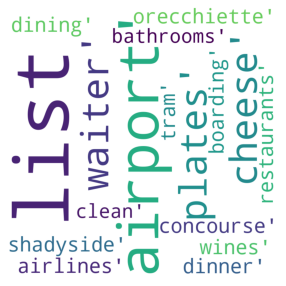

In [ ]:
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(df_mas_reviews['KEYWORDS'].values))

plt.figure(figsize=(5,5))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

### Sentences

Se obtienen las oraciones de cada review para mejorar el analisis

In [ ]:
# Se crea una columna con una lista de oraciones y otra con el numero de oraciones

%%time
df_mas_reviews["SENTENCES"] = df_mas_reviews.text.apply(lambda x: list(nlp(x).sents))


CPU times: user 2min 15s, sys: 2.75 s, total: 2min 18s
Wall time: 2min 18s


In [ ]:
%%time
df_mas_reviews["SENTENCES_NR"] = df_mas_reviews.text.apply(lambda x: len(list(nlp(x).sents)))

CPU times: user 2min 9s, sys: 1.22 s, total: 2min 11s
Wall time: 2min 10s


In [ ]:
df_mas_reviews.head()

user_id  ... SENTENCES_NR
2332  kdljP-HPIz1SMPZ2-B3NHA  ...            4
2333  UzqOYLCssQS2FBcDq5HwkA  ...           31
2334  TckShYnQa0eD3WQxdoE3GQ  ...           44
2335  5e90VuDs5VFSt99T3PSzBA  ...            4
2336  GSKY-zWTManYbMGXmRDb3g  ...            6

[5 rows x 14 columns]

### Lemmas

Se obtiene la raiz de cada palabra para poder hacer un mejor analisis. Definimos primero la funcion lemma y luego se aplica a todas las keywords

In [ ]:
#Definicion de funcion lemma para buscar raiz de cada palabra

import spacy
nlp = spacy.load('en_core_web_sm')   #libreria spacy Ingles, small

def lemma(review:str) -> str:
    """
    Lemmatize using spacy.
    """
    
    doc = nlp(review)
    lemma_review = []
    for token in doc:
        lemma_review.append(token.lemma_)
        
    return " ".join(lemma_review)

In [ ]:
df_mas_reviews["KEYWORDS"] = df_mas_reviews["KEYWORDS"].apply(lambda kw: [lemma(k) for k in kw])

In [ ]:
df_mas_reviews.head()

user_id  ... SENTENCES_NR
2332  kdljP-HPIz1SMPZ2-B3NHA  ...            4
2333  UzqOYLCssQS2FBcDq5HwkA  ...           31
2334  TckShYnQa0eD3WQxdoE3GQ  ...           44
2335  5e90VuDs5VFSt99T3PSzBA  ...            4
2336  GSKY-zWTManYbMGXmRDb3g  ...            6

[5 rows x 14 columns]

Ahora, se pueden graficar las Keywords según su frecuencia de aparición en las reviews.

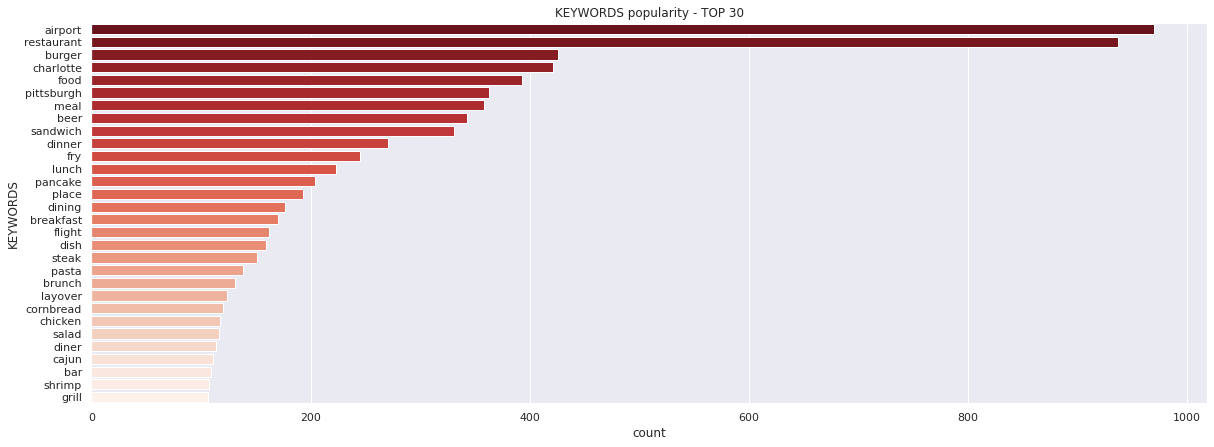

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(y=df_mas_reviews.explode("KEYWORDS").KEYWORDS, 
              order=df_mas_reviews.explode("KEYWORDS").KEYWORDS.value_counts().index[:30],
              palette='Reds_r')
plt.title("KEYWORDS popularity - TOP 30")
plt.yticks(rotation=0)
plt.show()

### Tópicos

Usamos BERTopic para extraer los tópicos de las reviews.

In [ ]:
%%time
topic_model = BERTopic(calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df_mas_reviews["text"].values)

Batches:   0%|          | 0/177 [00:00<?, ?it/s]

2021-11-29 23:09:18,201 - BERTopic - Transformed documents to Embeddings
2021-11-29 23:09:35,651 - BERTopic - Reduced dimensionality with UMAP
2021-11-29 23:09:37,019 - BERTopic - Clustered UMAP embeddings with HDBSCAN


CPU times: user 8min 43s, sys: 15.1 s, total: 8min 58s
Wall time: 6min 33s


In [ ]:
topics_data = topic_model.get_topic_info()
topics_data

,Topic,Count,Name
0,-1,1656,-1_we_were_had_our
1,0,1055,0_airport_flight_through_airports
2,1,320,1_pancakes_breakfast_eggs_hotcakes
3,2,198,2_beer_dog_dogs_beers
4,3,151,3_sandwich_fries_sandwiches_pittsburgh
5,4,151,4_vietnamese_broth_soup_food
6,5,140,5_she_waitress_her_table
7,6,119,6_casbah_brunch_birthday_dish
8,7,110,7_primanti_sandwich_primantis_fries
9,8,93,8_food_atmosphere_service_place


In [ ]:
df_mas_reviews["TOPIC_ID"] = topics
df_mas_reviews = df_mas_reviews.merge(topics_data, left_on="TOPIC_ID", right_on="Topic", how="left")
df_mas_reviews = df_mas_reviews.rename(columns={"Name": "TOPIC_NAME", "Count": "TOPIC_POPULARITY"})
df_mas_reviews = df_mas_reviews.drop(["Topic"], axis=1)
df_mas_reviews.head(3)

user_id  ...          TOPIC_NAME
0  kdljP-HPIz1SMPZ2-B3NHA  ...  -1_we_were_had_our
1  UzqOYLCssQS2FBcDq5HwkA  ...  -1_we_were_had_our
2  TckShYnQa0eD3WQxdoE3GQ  ...  -1_we_were_had_our

[3 rows x 17 columns]

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_keywords = df_mas_reviews.explode("KEYWORDS").groupby(["TOPIC_ID"]).agg({"KEYWORDS": pd.Series.mode})
topic_keywords = topic_keywords.rename(columns={"KEYWORDS": "TOPIC_MOST_FREQ_KEYWORD"})
df_mas_reviews = df_mas_reviews.merge(topic_keywords, how='left', on="TOPIC_ID")
df_mas_reviews.head()

user_id  ... TOPIC_MOST_FREQ_KEYWORD
0  kdljP-HPIz1SMPZ2-B3NHA  ...              restaurant
1  UzqOYLCssQS2FBcDq5HwkA  ...              restaurant
2  TckShYnQa0eD3WQxdoE3GQ  ...              restaurant
3  5e90VuDs5VFSt99T3PSzBA  ...                  casbah
4  GSKY-zWTManYbMGXmRDb3g  ...              pittsburgh

[5 rows x 18 columns]

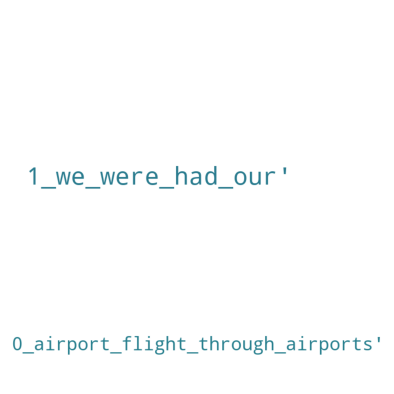

In [ ]:
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(df_mas_reviews['TOPIC_NAME'].values))

plt.figure(figsize=(7,7))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

###Sentimientos

In [ ]:
def get_sentiment(text:str)->str:
  pol = TextBlob(text).sentiment.polarity
  if pol > 0.1:
    return "POS"
  elif pol < -0.1:
    return "NEG"
  else:
    return "NEU"

Se aplica funcion get_sentiment a la columna text.

In [ ]:
df_mas_reviews['SENTIMENT'] = df_mas_reviews['text'].apply(get_sentiment)

In [ ]:
df_mas_reviews.head()

user_id  ... SENTIMENT
0  kdljP-HPIz1SMPZ2-B3NHA  ...       POS
1  UzqOYLCssQS2FBcDq5HwkA  ...       POS
2  TckShYnQa0eD3WQxdoE3GQ  ...       POS
3  5e90VuDs5VFSt99T3PSzBA  ...       POS
4  GSKY-zWTManYbMGXmRDb3g  ...       POS

[5 rows x 19 columns]

Análisis de sentimientos

In [ ]:
df_mas_reviews['polarity'] = df_mas_reviews['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_mas_reviews['polarity'].head()

0    0.740000
1    0.265981
2    0.320605
3    0.480000
4    0.407500
Name: polarity, dtype: float64

In [ ]:
df_mas_reviews['subjectivity'] = df_mas_reviews['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df_mas_reviews['subjectivity'].head() 

0    0.700000
1    0.537549
2    0.586450
3    0.820000
4    0.667500
Name: subjectivity, dtype: float64

In [ ]:
print('Máximo valor', df_mas_reviews['polarity'].max())
print('Mínimo valor', df_mas_reviews['polarity'].min())
print('Valor medio', df_mas_reviews['polarity'].mean())

Máximo valor 1.0
Mínimo valor -1.0
Valor medio 0.2606493484419023


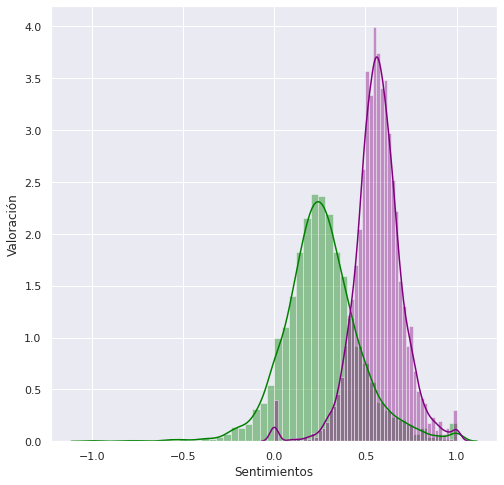

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(df_mas_reviews['polarity'], color = 'green')
sns.distplot(df_mas_reviews['subjectivity'], color = 'purple')
plt.xlabel('Sentimientos')
plt.ylabel('Valoración')
plt.show()

Análisis Polaridad

In [ ]:
def get_polarity(text):
  analysis = TextBlob(text)
  if text != '':
      result = analysis.sentiment.polarity
      return result

In [ ]:
df_mas_reviews['polarity'] = df_mas_reviews['text'].apply(get_polarity)

In [ ]:
def x_range(x):
  if x > 0.1:
    return 'POSITIVO'
  elif x < -0.1:
    return 'NEGATIVO'
  else:
    return 'NEUTRO'

In [ ]:
df_mas_reviews['result'] = df_mas_reviews['polarity'].apply(x_range)

In [ ]:
df_mas_reviews['result'].value_counts()

POSITIVO    4587
NEUTRO       885
NEGATIVO     178
Name: result, dtype: int64

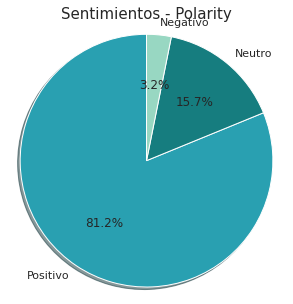

In [ ]:
plt.figure(figsize = (5,5))
labels = 'Positivo', 'Neutro', 'Negativo'
colors = ['#29A0B1','#167D7F','#98D7C2']
plt.pie(df_mas_reviews['result'].value_counts(), labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title('Sentimientos - Polarity', fontsize = 15)
plt.axis('equal')
plt.show()

### Analisis de keywords y topics por negocio (business id)

In [ ]:
!pip install scipy

In [ ]:
df_mas_reviews.groupby(['SENTIMENT', 'business_id']).agg({'SENTIMENT':'count'}, ascending=False)

SENTIMENT
SENTIMENT business_id                      
NEG       2Igiyhi82R8_QaaPplRmCw          3
          2SwC8wqpZC4B9iFVTgYT9A          2
          2X5G4Ujq0s4Wfn4TC7gX0g          2
          3Q0QQPnHcJuX1DLCL9G9Cg         61
          9SPwF-vRgtuHxciFxv5YLA          2
          CChwRoYVXA3QZulS8a6xOQ          1
          MQnNtW1lHS-eid3QNUoUIw          3
          NTfUFk8GyOLL1uPbEO-pVg          4
          NeUf9FyCCIN4MEseNyqkXQ         25
          TxKmAsKQjND5vbhBdUSyIA          4
          WuCcv_Dyd_1B_1-4jwK7sQ          8
          XmdTkxKyJd7TuDLoiic1kg          4
          dxCqGkhtXq-9fYEsX7Mf6Q          9
          ePP0Eqz8JKSbtdt2phiB4A          2
          jTGQUWGIVvL-aY03C5BEmw          4
          mpDxBBGywUE6GRRKja3sBA         14
          rgmptwPbBH1wLpiBHcbIhA          3
          vgXE1I7c9ElcfYyZfQiN1Q          8
          xgK6AAhJ-cYBUCSaLzgTuw          6
          ym9QwkmB5ZKTyj7q5huTDw         13
NEU       2Igiyhi82R8_QaaPplRmCw         25
          2SwC8wqpZC4B9iFVTgYT9A         18
          2X5G4Ujq0s4Wfn4TC7gX0g         22
          3Q0QQPnHcJuX1DLCL9G9Cg        266
          9SPwF-vRgtuHxciFxv5YLA         14
          CChwRoYVXA3QZulS8a6xOQ         11
          MQnNtW1lHS-eid3QNUoUIw         20
          NTfUFk8GyOLL1uPbEO-pVg         21
          NeUf9FyCCIN4MEseNyqkXQ         85
          TxKmAsKQjND5vbhBdUSyIA         21
          WuCcv_Dyd_1B_1-4jwK7sQ         27
          XmdTkxKyJd7TuDLoiic1kg         36
          dxCqGkhtXq-9fYEsX7Mf6Q         32
          ePP0Eqz8JKSbtdt2phiB4A         11
          jTGQUWGIVvL-aY03C5BEmw         31
          mpDxBBGywUE6GRRKja3sBA        114
          rgmptwPbBH1wLpiBHcbIhA         35
          vgXE1I7c9ElcfYyZfQiN1Q         38
          xgK6AAhJ-cYBUCSaLzgTuw         28
          ym9QwkmB5ZKTyj7q5huTDw         30
POS       2Igiyhi82R8_QaaPplRmCw        185
          2SwC8wqpZC4B9iFVTgYT9A        219
          2X5G4Ujq0s4Wfn4TC7gX0g        219
          3Q0QQPnHcJuX1DLCL9G9Cg        741
          9SPwF-vRgtuHxciFxv5YLA        170
          CChwRoYVXA3QZulS8a6xOQ        199
          MQnNtW1lHS-eid3QNUoUIw        189
          NTfUFk8GyOLL1uPbEO-pVg        225
          NeUf9FyCCIN4MEseNyqkXQ        277
          TxKmAsKQjND5vbhBdUSyIA        155
          WuCcv_Dyd_1B_1-4jwK7sQ        147
          XmdTkxKyJd7TuDLoiic1kg        209
          dxCqGkhtXq-9fYEsX7Mf6Q        147
          ePP0Eqz8JKSbtdt2phiB4A        184
          jTGQUWGIVvL-aY03C5BEmw        257
          mpDxBBGywUE6GRRKja3sBA        399
          rgmptwPbBH1wLpiBHcbIhA        183
          vgXE1I7c9ElcfYyZfQiN1Q        197
          xgK6AAhJ-cYBUCSaLzgTuw        139
          ym9QwkmB5ZKTyj7q5huTDw        146

###Entidades

In [ ]:
doc = nlp('data science 2021')

In [ ]:
if doc.ents: 
  for ent in doc.ents: 
    print(f"Entidad: {ent.text} - Label: {ent.label_} - Explain: {str(spacy.explain(ent.label_))}") 

else: print('No se encontraron entidades')

No se encontraron entidades


In [ ]:
def get_ner(txt:str) -> list:
  lista = []

  doc = nlp(txt)
  if doc.ents: 
    for ent in doc.ents:
      lista.append(ent.text) 
     
  return list(set(lista))

In [ ]:
%%time
df_mas_reviews['NER'] = df_mas_reviews['text'].apply(get_ner)

CPU times: user 2min 14s, sys: 863 ms, total: 2min 15s
Wall time: 2min 15s


In [ ]:
df_mas_reviews.head()

user_id  ...                                                                                                                                                                       NER
0  kdljP-HPIz1SMPZ2-B3NHA  ...                                                                                                                                                                     [Tim]
1  UzqOYLCssQS2FBcDq5HwkA  ...                                                  [7, Pittsburgh, salmon appetizer, 10, 20, 22, hour, HH, mimosa, 16, 5, Sundays, Veuve Cliquot, Casbah, 29, soooo, yummy]
2  TckShYnQa0eD3WQxdoE3GQ  ...  [almost every day of the year, al dente', Lamb, house, Fiona, ravioli, hour, over $10, one, just $5, summer, S. Highland, two, last night, shortribs, Shadyside, Monday]
3  5e90VuDs5VFSt99T3PSzBA  ...                                                                                                                                                                  [Casbah]
4  GSKY-zWTManYbMGXmRDb3g  ...                                                                                                                                                      [3.5, 3, Pittsburgh]

[5 rows x 23 columns]

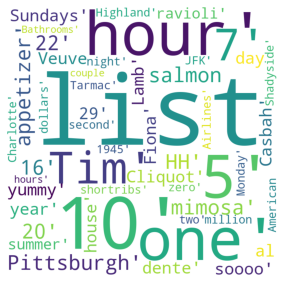

In [ ]:
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(df_mas_reviews['NER'].values))

plt.figure(figsize=(5,5))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [ ]:
df_exploded =df_mas_reviews.explode(column='NER')
df_exploded.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,text_len,KEYWORDS,SENTENCES,SENTENCES_NR,TOPIC_ID,TOPIC_POPULARITY,TOPIC_NAME,TOPIC_MOST_FREQ_KEYWORD,SENTIMENT,polarity,subjectivity,result,NER
0,kdljP-HPIz1SMPZ2-B3NHA,RWU0-370PJUlEzz5AX_u4w,"Great stuff here...The cheese plates are great and always changing. Awesome staff, and the menu offers an nice variety!!\n\nAsk for Tim for your waiter!",0,2SwC8wqpZC4B9iFVTgYT9A,0,4,2007-04-25,review,0,150,"[plate, cheese, waiter]","[(Great, stuff, here, ...), (The, cheese, plates, are, great, and, always, changing, .), (Awesome, staff, ,, and, the, menu, offers, an, nice, variety, !, !, \n\n), (Ask, for, Tim, for, your, waiter, !)]",4,-1,1656,-1_we_were_had_our,restaurant,POS,0.740000,0.700000,POSITIVO,Tim
1,UzqOYLCssQS2FBcDq5HwkA,8rMME0OWVJQ2FeeHG7wUfQ,"This place used to have a great bar/tapas menu with a decent selection of happy hour wine specials. Now... not so much. Well, during HH, you can get any of the wines under $10 for $5. Selection by the glass is limited. \n\nAs for their menu/dinner - this is totally a different story. I haven't really been disappointed yet! The appetizers/small plates all pretty good, I really like the chevre croquettes ($7). The salads are good and although I haven't gotten the soup anytime lately, I hear great things from my friends. The entrees are always excellent - I usually tend to stick to the seafood (halibut, $29) and never have been disappointed (and importantly, nothing has ever been overcooked). The signature orecchiette dish ($20) is soooo delicious - just ignore the fact that it is a heart attack waiting to happen - it's worth it. The desserts are ok, personally, I feel that you would be better advised to stick to filling up on the entrees. \n\nOh, and let me recommend the blood orange martini if they have it - very very yummy! And it is nice that you can order Veuve Cliquot by the glass ($16).\n\nPrices are a bit high for what you'd expect for Pittsburgh, but considering the quality of food, I would recommend it.\n\nP.S. I have heard that they have a great brunch on Sundays. I personally haven't tried it, but with the number of compliments I hear, it's probably worth the try!\n\n-------------------------\nUpdate 12/9/07: Went to the brunch. What a great deal! For $22, you get a choice of alcoholic beverage (bloody mary, mimosa, bellini) as well as a starter and then the entree. They have a lot of choices, so be prepared to just try one and come back again to try the other stuff! The smoked salmon appetizer was good although with too much mayonnaise sauce and for me, too much onion. The truffled potato was yummy. The arugula salad was as delicious as ever! And for entree, we both got the Casbah benedict. I have to admit that neither of us was blown away, but it was good and filling. I think that we will both be back to try other things on the menu!",0,2SwC8wqpZC4B9iFVTgYT9A,0,4,2007-07-16,review,1,2092,"[orecchiette, wine, dinner]","[(This, place, used, to, have, a, great, bar, /, tapas, menu, with, a, decent, selection, of, happy, hour, wine, specials, ., ), (Now, ..., , not, so, much, ., ), (Well, ,, during, HH, ,, you, can, get, any, of, the, wines, under, $, 10, for, $, 5, ., ), (Selection, by, the, glass, is, limited, ., \n\n), (As, for, their, menu, /, dinner, -, this, is, totally, a, different, story, ., ), (I, have, n't, really, been, disappointed, yet, !, ), (The, appetizers, /, small, plates, all, pretty, good), (,, I, really, like, the, chevre, croquettes, (, $, 7, ), ., ), (The, salads, are, good, and, although, I, have, n't, gotten, the, soup, anytime, lately, ,, I, hear, great, things, from, my, friends, ., ), (The, entrees, are, always, excellent, -, I, usually, tend, to, stick, to, the, seafood, (, halibut, ,, $, 29, ), and, never, have, been, disappointed, (, and, importantly, ,, nothing, has, ever, been, overcooked, ), ., ), (The, signature, orecchiette, dish, (, $, 20, ), is, soooo, 

In [ ]:
df_exploded.groupby('NER').count().sort_values(by='text',ascending=False).head(20).text

NER
Pittsburgh    664
Charlotte     659
one           648
first         560
two           464
2             248
Italian       247
3             232
One           215
5             214
three         205
4             192
second        171
night         162
Mert          157
Sunday        156
half          136
Saturday      132
First         132
Casbah        129
Name: text, dtype: int64

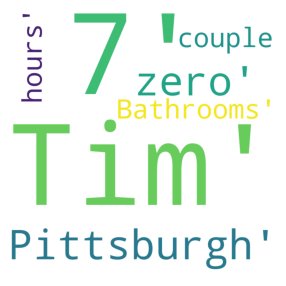

In [ ]:
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(df_exploded['NER'].values))

plt.figure(figsize=(5,5))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()